<a href="https://colab.research.google.com/github/lydiahmorah/lydiahmorah/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as numpy
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [50]:
#loading the dataset
data=pd.read_csv("/content/drive/MyDrive/Python Projects/Churn Prediction/HR_Dataset.csv")
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
7741,0.52,0.96,4,125,3,0,0,0,hr,low
2503,0.61,0.99,4,251,2,0,0,0,IT,low
13785,0.49,0.52,4,161,7,0,0,0,management,high
5513,0.23,0.50,5,100,3,0,0,0,sales,medium


In [51]:
#checking columns
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [52]:
#remaning the Departments columns to departments
data.rename(columns={"Departments ":"departments "},inplace=True)
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments ', 'salary'],
      dtype='object')

# **Find Shape of the Dataset (Number of Rows And Number of Columns)**

In [53]:
#Find Shape of Our Dataset (Number of Rows And Number of Columns)
data.shape

(14999, 10)

# **Get Information About the Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# **Overall Statistics About The Dataset**

In [55]:
#t Overall Statistics About The Dataset
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# **Check Null Values In The Dataset**

In [56]:
#Check Null Values In The Dataset
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
departments,0
salary,0


# **Handling Duplicates in the dataset**

In [57]:
#handling duplicates
data.duplicated().any()

True

In [58]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [59]:
#dropping the duplicates from the dataset
data=data.drop_duplicates()
data.duplicated().any()

False

In [60]:
#new shape
data.shape

(11991, 10)

# **Plotting the target variable**

In [61]:
data["left"].value_counts()

,count
left,
0,10000
1,1991


<Axes: xlabel='left'>

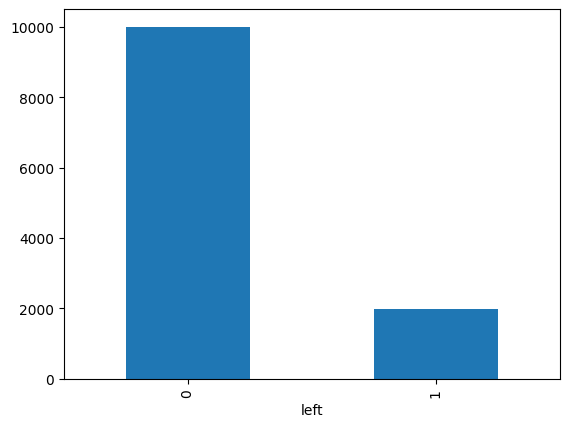

In [62]:
data["left"].value_counts().plot(kind="bar")


# **Creating a feature matrix X and Response variable y**

In [63]:
#creating the feature matrix
X=data.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [64]:
#the target varible
y=data['left']
y.head()

,left
0,1
1,1
2,1
3,1
4,1


# **Column Transformer and Pipeline**

In [65]:
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [66]:
#Column Transformer and Pipeline
preprocessor= ColumnTransformer(transformers=[
    ('num', StandardScaler(),['satisfaction_level',
                              'last_evaluation',
                              'number_project',
                              'average_montly_hours',
                              'time_spend_company']),
    ('nominal', OneHotEncoder(),['departments ']),
    ('ordinal', OrdinalEncoder(),['salary'])


],remainder='passthrough')

# **Create the pipeline**

In [67]:
#instantiating the pipeline
pipeline= Pipeline ([
    ('preprocessor',preprocessor),#this step will be the input of the next step which is the model
    ('model',LogisticRegression())
])

In [68]:
#setting upse_config to visualize the created pipeline
from sklearn import set_config

In [69]:
set_config(display='diagram')

In [70]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments ']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

# **Splitting The Dataset Into The Training Set And Test Set**

In [71]:
#Splitting The Dataset Into The Training Set And Test Set
# the variabel stratify ensures that the class distribution in the original
# dataset is preserved in both the train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [72]:
#trin the created pipeline on the training set
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments ']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

# **Generate predictions using the y_test set**

In [73]:
#perfoming predictions
y_pred=pipeline.predict(X_test)

# **Check for accuracy scores using the y_test and y_predictions**

In [74]:
#checking accuracy score
accuracy_score(y_test,y_pred)

0.8374322634431013

# **The dataset is imbalanced we cannot rely only on accuracy_score. Let's check other scores like precision_score,recall_score**

In [75]:
#checking for precision score
precision_score(y_test,y_pred)

0.5240963855421686

In [76]:
#checking for recall score
recall_score(y_test,y_pred)

0.2185929648241206

# **Create a model function to store the values of the different models we are going to create**

In [87]:
#let's check the perfomance of other models as well. #let's create a function first to store the values of our model

def model_evaluation(model_name,model):
  #create a python list to store accuracy,precisio  and recall score
    output=[]

  #append the model name to the empty list
    output.append(model_name)

  #generate predictions
    pipeline= Pipeline ([
    ('preprocessor',preprocessor),#this step will be the input of the next step which is the model
    ('model',model)])
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

    pipeline.fit(X_train,y_train)

    y_pred=pipeline.predict(X_test)

    output.append(accuracy_score(y_test,y_pred))

    output.append(precision_score(y_test,y_pred))

    output.append(recall_score(y_test,y_pred))

    return output

# **Create a model dictionary for the models**

In [88]:
#creating model dictionary for the logistic regression,random forest,decision tree classifier and XGBClassifier
model_dict={
    'LogReg':LogisticRegression(),
    'DecisionTC':DecisionTreeClassifier(),
    'RandomFC':RandomForestClassifier(),
    'XGBC':XGBClassifier()
}

In [89]:
#creating another function
model_output=[]
for model_name,model in model_dict.items():
  model_output.append(model_evaluation(model_name,model))


In [90]:
model_output

[['LogReg', 0.8374322634431013, 0.5240963855421686, 0.2185929648241206],
 ['DecisionTC', 0.9658190912880367, 0.8761904761904762, 0.9246231155778895],
 ['RandomFC', 0.9862442684451855, 0.9892761394101877, 0.9271356783919598],
 ['XGBC', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [91]:
#Column Transformer and Pipeline
preprocessor= ColumnTransformer(transformers=[
    ('num', StandardScaler(),['satisfaction_level',
                              'last_evaluation',
                              'number_project',
                              'average_montly_hours',
                              'time_spend_company']),
    ('nominal', OneHotEncoder(),['departments ']),
    ('ordinal', OrdinalEncoder(),['salary'])


],remainder='passthrough')

In [93]:
#instantiating the pipeline
pipeline= Pipeline ([
    ('preprocessor',preprocessor),#this step will be the input of the next step which is the model
    ('model',RandomForestClassifier())
])

In [94]:
pipeline.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments ']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [97]:
#a sample data we going to predict
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments ':'sales',
    'salary':'low'


},index=[0])

In [98]:
result = pipeline.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


# **Save The Model**

In [100]:
#Save The Model

import pickle
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)


In [101]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [102]:
result = pipeline_saved.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')